In [1]:
from epimodels.continuous.models import SIR
from epimodels.discrete.models import SIR as SIRc
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [2]:
def simplified_model(S_0, I_0, R_0, pop, t, beta, gamma):
    S = [S_0]
    I = [I_0]
    R = [R_0]
    t_ser = []
    for i in range(0, t):
        S_to_I = S[i] * I[i] * beta / pop
        I_to_R = I[i] * gamma

        S.append(S[i] - S_to_I)
        I.append(I[i] + S_to_I - I_to_R)
        R.append(R[i] + I_to_R)
        t_ser.append(i)
    t_ser.append(t_ser[-1] + 1)
    return [S, I, R, t_ser]

def simplified_model_smaller_time_step(S_0, I_0, R_0, pop, t, beta, gamma):
    S = [S_0]
    I = [I_0]
    R = [R_0]
    step = 10
    t_ser = []
    cnt = 0
    for i in range(0, t*step):
        S_to_I = S[i] * I[i] * beta / pop / pop
        I_to_R = I[i] * gamma

        S.append(S[i] - S_to_I)
        I.append(I[i] + S_to_I - I_to_R)
        R.append(R[i] + I_to_R)
        t_ser.append(i/step)
    t_ser.append(t_ser[-1] + 0.1+step)
    return [S, I, R, t_ser]

def plot_sim(a):
    S, I, R = a[:3]
    t = a[3]

    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I, label="Infected")
    plt.plot(t, R, label="Recovered")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR simplified")
    plt.grid(True)
    plt.show()

def plot_original(a):
    '''same as plot_traces'''
    S, I, R = a.y
    t = a.t

    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I, label="Infected")
    plt.plot(t, R, label="Recovered")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

def plot_both(o, s):
    '''same as plot_traces'''
    S_0, I_0, R_0 = o.y
    t_0 = o.t

    S_1, I_1, R_1 = s[:3]
    t_1 = s[3]

    plt.plot(t_0, S_0, label="Susceptible")
    plt.plot(t_0, I_0, label="Infected")
    plt.plot(t_0, R_0, label="Recovered")

    plt.plot(t_1, S_1, label="Susceptible sim")
    plt.plot(t_1, I_1, label="Infected sim")
    plt.plot(t_1, R_1, label="Recovered sim")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

def plot_both_discrete(o, s):
    '''same as plot_traces'''
    S_0, I_0, R_0 = o['S'], o['I'], o['R']
    t_0 = o['time']

    S_1, I_1, R_1 = s[:3]
    t_1 = s[3]

    plt.plot(t_0, S_0, label="Susceptible")
    plt.plot(t_0, I_0, label="Infected")
    plt.plot(t_0, R_0, label="Recovered")

    plt.plot(t_1, S_1, label="Susceptible sim")
    plt.plot(t_1, I_1, label="Infected sim")
    plt.plot(t_1, R_1, label="Recovered sim")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

def plot_both_epim(o, s):
    '''same as plot_traces'''
    S_0, I_0, R_0 = o.y
    t_0 = o.t

    S_1, I_1, R_1 = s['S'], s['I'], s['R']
    t_1 = s['time']

    plt.plot(t_0, S_0, label="Susceptible")
    plt.plot(t_0, I_0, label="Infected")
    plt.plot(t_0, R_0, label="Recovered")

    plt.plot(t_1, S_1, label="Susceptible sim")
    plt.plot(t_1, I_1, label="Infected sim")
    plt.plot(t_1, R_1, label="Recovered sim")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

In [3]:
def wrapper_for_inter(beta):
    pop = 1000
    
    I = 1
    R = 0
    S = pop - I - R
    t = 100
    beta = beta
    gamma = 0.125

    original = SIR()
    original([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    o = original.run([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    s = simplified_model(S, I, R, pop, t, beta, gamma)

    plot_both(o, s)

In [4]:
def wrapper_for_inter(beta):
    pop = 1000
    
    I = 1
    R = 0
    S = pop - I - R
    t = 100
    beta = beta
    gamma = 0.125

    original = SIR()
    original([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    o = original.run([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    s = simplified_model(S, I, R, pop, t, beta, gamma)

    plot_both(o, s)

In [5]:
def wrapper_for_inter_discr(beta, gamma):
    pop = 1000
    
    I = 1
    R = 0
    S = pop - I - R
    t = 100
    beta = beta
    gamma = gamma

    original = SIRc()
    original([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    o = original.run([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    s = simplified_model(S, I, R, pop, t, beta, gamma)

    plot_both_discrete(o, s)

In [6]:
def wrapper_for_inter_epim(beta, gamma):
    pop = 100000
    
    I = 1
    R = 0
    S = pop - I - R
    t = 100
    beta = beta
    gamma = gamma

    original = SIR()
    original([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    o = original.run([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})

    simpl = SIRc()
    simpl([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})
    s = simpl.run([S, I, R], [0, t], pop, {'beta': beta, 'gamma': gamma})

    plot_both_epim(o, s)

In [7]:
interact(wrapper_for_inter_epim, beta=FloatSlider(value=1.0, min=0, max=5.0, step=0.1, description='Beta'),
         gamma=FloatSlider(value=0.25, min=0, max=1, step=0.025, description='Gamma'))

interactive(children=(FloatSlider(value=1.0, description='Beta', max=5.0), FloatSlider(value=0.25, description…

<function __main__.wrapper_for_inter_epim(beta, gamma)>

In [ ]:
interact(wrapper_for_inter, beta=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Beta'))

interactive(children=(FloatSlider(value=1.0, description='Beta', max=5.0, min=0.1), Output()), _dom_classes=('…

<function __main__.wrapper_for_inter(beta)>

In [58]:
interact(wrapper_for_inter_discr, beta=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Beta'),
         gamma=FloatSlider(value=0.25, min=0, max=1, step=0.025, description='Gamma'))

interactive(children=(FloatSlider(value=1.0, description='Beta', max=5.0, min=0.1), FloatSlider(value=0.25, de…

<function __main__.wrapper_for_inter_discr(beta, gamma)>

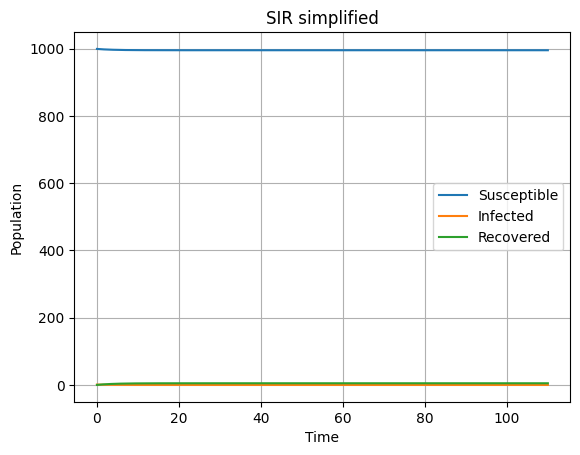

In [5]:
pop = 1000
    
I = 1
R = 0
S = pop - I - R
t = 100
beta = 100
gamma = 0.125

a = simplified_model_smaller_time_step(S, I, R, pop, t, beta, gamma)
plot_sim(a)